<a href="https://colab.research.google.com/github/nikkii03/Handwritten_Maths_Evaluator/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

## Loading the dataset

In [ ]:
equation_dataset = pd.read_csv("dataset.csv")                   #importing the datset

y = equation_dataset["label"]                                   #creating label
X = equation_dataset.drop(labels = ["label"], axis = 1)         #dropping label

del equation_dataset                                            #deleting dataset to reduce memory usage

## Overview of the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       2       1       1       1  ...         0         0         0         0
2       1       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]


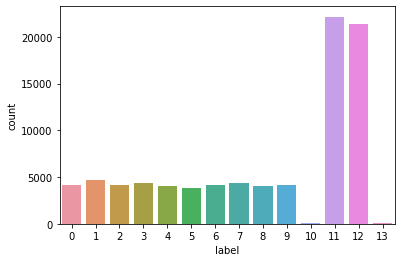

In [ ]:
g = sns.countplot(y)
y.value_counts()

print(X.head())

## Image processing

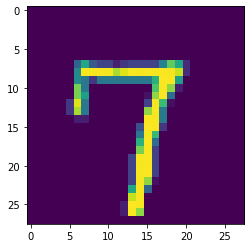

In [ ]:
X = X / 255.0                                                           #Grayscale normalization
X = X.values.reshape(-1,28,28,1)                                        #Reshaping image

y = to_categorical(y, num_classes = 14)                                 #categorical conversion of label

random_seed = 2                                                         #Splitting the dataset into test and training data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.1 , random_state = random_seed, stratify = y)

g = plt.imshow(X[322][:,:,0])                                           #an example

## Creating the model

In [ ]:
model = Sequential()

#adding layers to the model

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", 
                 input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))                                                                     
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))                                                                      
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(14, activation = "softmax"))                                            # fully connected layer and output

#Set the optimizer and annealer
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay=0.0 )
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", 
              metrics = ["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)

#data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,                                                       # set input mean to 0 over the dataset
        samplewise_center=False,                                                        # set each sample mean to 0
        featurewise_std_normalization=False,                                            # divide inputs by std of the dataset
        samplewise_std_normalization=False,                                             # divide each input by its std
        zca_whitening=False,                                                            # apply ZCA whitening
        rotation_range=10,                                                              # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1,                                                               # Randomly zoom image 
        width_shift_range=0.1,                                                          # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                                                         # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,                                                          # randomly flip images
        vertical_flip=False)                                                            # randomly flip images

datagen.fit(X_train)

epochs = 10                                                                             # fitting the model
batch_size = 86


history = model.fit_generator(  datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs,                                        # An epoch is an iteration over the entire x and y data provided
                                validation_data = (X_val,y_val),                        # Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                verbose = 1,                                            # output
                                steps_per_epoch=X_train.shape[0] // batch_size,         # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                                callbacks=[learning_rate_reduction]                            
                              )

model.save("model.h5")                        #saving the model in HDF5 binary data format

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
896/896 [==============================] - 546s 608ms/step - loss: 0.2621 - accuracy: 0.9194 - val_loss: 0.0695 - val_accuracy: 0.9796
Epoch 2/10
896/896 [==============================] - 535s 597ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0348 - val_accuracy: 0.9895
Epoch 3/10
896/896 [==============================] - 527s 588ms/step - loss: 0.0618 - accuracy: 0.9821 - val_loss: 0.0282 - val_accuracy: 0.9921
Epoch 4/10
896/896 [==============================] - 548s 611ms/step - loss: 0.0582 - accuracy: 0.9832 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 5/10
896/896 [==============================] - 549s 612ms/step - loss: 0.0553 - accuracy: 0.9848 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 6/10
896/896 [==============================] - 548s 612ms/step - loss: 0.0549 - accuracy: 0.9850 - val_loss: 0.0289 - val_accuracy: 0.9917

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
896/896 [=======================